# **KHANIF FAUZI PAMBUDI (GRADED CHALLENGE 4 PHASE 1)**

Graded  Challenge  ini  dibuat  guna  mengevaluasi pembelajaran  pada  Hacktiv8  Data  Science  Fulltime Program khususnya pada konsep Clustering. Untuk datasetnya dapat diakses melalui https://www.kaggle.com/arjunbhasin2013/ccdata


Dengan Keterangan Kolom pada dataset nya sebagai berikut

*   CUSTID : Identification of Credit Card holder (Categorical)

*   BALANCE : Balance amount left in their account to make purchases 

*   BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

*   PURCHASES : Amount of purchases made from account

*   ONEOFFPURCHASES : Maximum purchase amount done in one-go

*   INSTALLMENTSPURCHASES : Amount of purchase done in installment

*   CASHADVANCE : Cash in advance given by the user

*   PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

*   ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
*   PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)


*   CASHADVANCEFREQUENCY : How frequently the cash in advance being paid


*   CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"


*   PURCHASESTRX : Numbe of purchase transactions made


*   CREDITLIMIT : Limit of Credit Card for user


*   PAYMENTS : Amount of Payment done by user


*   MINIMUM_PAYMENTS : Minimum amount of payments made by user


*   PRCFULLPAYMENT : Percent of full payment paid by user


*   TENURE : Tenure of credit card service for user

# **IMPORT LIBRARY**

In [285]:
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering as SC, AgglomerativeClustering as AC
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

# **DATA LOADING**

In [286]:
df=pd.read_csv("CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [287]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [288]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


# **DATA EXPLORATION**

In [289]:
len(df)

8950

In [290]:
df.shape

(8950, 18)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [292]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [293]:
nmbr_cols=df[df.describe().columns.values]
ctg_cols=df.drop(columns=df.describe().columns.values)

In [294]:
nmbr_cols

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [295]:
nmbr_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [296]:
ctg_cols

,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005
...,...
8945,C19186
8946,C19187
8947,C19188
8948,C19189


In [297]:
ctg_cols.describe().T

,count,unique,top,freq
CUST_ID,8950,8950,C15731,1


# **MISSING VALUE**

In [298]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [299]:
Credlim = df['CREDIT_LIMIT'] #mencari mean dari data MaxTemp
print(Credlim.mode())

0    3000.0
dtype: float64


In [300]:
Minpay = df['MINIMUM_PAYMENTS'] #mencari mean dari data MaxTemp
print(Minpay.mean())

864.2065423050814


In [301]:
df['CREDIT_LIMIT'].fillna('3000.0', inplace = True) #mengisi missing value CREDIT_LIMIT dengan nilai mode 3000.0
df['MINIMUM_PAYMENTS'].fillna('864.206542', inplace = True) #mengisi missing value MINIMUM_PAYMENTS dengan nilai mean 864.206542

In [302]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# **EDA**

In [303]:
df['BALANCE'].value_counts()

0.000000       80
1100.941072     1
40.074484       1
2093.844656     1
179.765708      1
               ..
1139.691004     1
3494.152843     1
2388.503738     1
2153.498372     1
510.233775      1
Name: BALANCE, Length: 8871, dtype: int64

In [304]:
df['BALANCE_FREQUENCY'].value_counts()

1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.400000      10
0.555556      10
0.300000       9
0.200000       9
0.375000       9
0.125000       9
0.285714       8
0.100000       8
0.250000       8
0.444444       7
0.166667       7
0.142857       7
0.600000       6
0.111111       5
0.222222       5
0.428571       5
Name: BALANCE_FREQUENCY, dtype: int64

In [305]:
df['PURCHASES'].value_counts()

0.00       2044
45.65        27
150.00       16
60.00        16
100.00       13
           ... 
963.35        1
1260.13       1
203.60        1
35.97         1
169.66        1
Name: PURCHASES, Length: 6203, dtype: int64

In [306]:
df['ONEOFF_PURCHASES'].value_counts()

0.00       4302
45.65        46
50.00        17
200.00       15
60.00        13
           ... 
2814.23       1
2281.56       1
458.00        1
155.00        1
153.11        1
Name: ONEOFF_PURCHASES, Length: 4014, dtype: int64

In [307]:
df['INSTALLMENTS_PURCHASES'].value_counts()

0.00       3916
100.00       14
300.00       14
200.00       14
150.00       12
           ... 
1184.98       1
1673.59       1
1632.96       1
749.79        1
482.68        1
Name: INSTALLMENTS_PURCHASES, Length: 4452, dtype: int64

In [308]:
df['CASH_ADVANCE'].value_counts()

0.000000       4628
1286.356207       1
3816.470266       1
2495.298926       1
748.241727        1
               ... 
1282.314634       1
1384.954139       1
576.920984        1
1502.014320       1
1873.271885       1
Name: CASH_ADVANCE, Length: 4323, dtype: int64

In [309]:
df['PURCHASES_FREQUENCY'].value_counts()

1.000000    2178
0.000000    2043
0.083333     677
0.916667     396
0.500000     395
0.166667     392
0.833333     373
0.333333     367
0.250000     345
0.583333     316
0.666667     310
0.750000     299
0.416667     289
0.090909      43
0.125000      32
0.909091      28
0.100000      27
0.142857      26
0.875000      26
0.857143      25
0.900000      24
0.818182      21
0.545455      20
0.454545      19
0.272727      19
0.200000      19
0.111111      18
0.888889      18
0.636364      17
0.181818      16
0.571429      16
0.727273      15
0.714286      13
0.300000      13
0.222222      12
0.700000      11
0.600000      11
0.375000      10
0.363636      10
0.428571       9
0.800000       9
0.400000       9
0.625000       8
0.285714       8
0.555556       7
0.777778       6
0.444444       5
Name: PURCHASES_FREQUENCY, dtype: int64

In [310]:
df['ONEOFF_PURCHASES_FREQUENCY'].value_counts()

0.000000    4302
0.083333    1104
0.166667     592
1.000000     481
0.250000     418
0.333333     355
0.416667     244
0.500000     235
0.583333     197
0.666667     167
0.916667     151
0.750000     142
0.833333     120
0.090909      56
0.125000      41
0.100000      39
0.142857      37
0.181818      34
0.200000      27
0.111111      26
0.454545      13
0.363636      13
0.222222      12
0.272727      12
0.571429      11
0.375000      11
0.300000      10
0.818182      10
0.285714       9
0.428571       8
0.545455       8
0.600000       7
0.636364       7
0.714286       7
0.727273       6
0.875000       6
0.400000       5
0.909091       4
0.444444       4
0.800000       4
0.700000       4
0.625000       3
0.888889       2
0.777778       2
0.555556       2
0.900000       1
0.857143       1
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: int64

In [311]:
df['PURCHASES_INSTALLMENTS_FREQUENCY'].value_counts()

0.000000    3915
1.000000    1331
0.416667     388
0.916667     345
0.833333     311
0.500000     310
0.166667     305
0.666667     292
0.750000     291
0.083333     275
0.250000     255
0.333333     255
0.583333     225
0.857143      30
0.888889      28
0.875000      28
0.909091      25
0.714286      22
0.818182      21
0.454545      19
0.900000      19
0.800000      18
0.636364      16
0.181818      14
0.777778      13
0.272727      13
0.545455      13
0.090909      12
0.600000      12
0.363636      11
0.700000      11
0.300000      10
0.625000      10
0.571429      10
0.555556      10
0.200000       9
0.111111       9
0.727273       9
0.285714       9
0.400000       8
0.444444       8
0.428571       7
0.142857       6
0.375000       6
0.100000       6
0.222222       5
0.125000       5
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: int64

In [312]:
df['CASH_ADVANCE_FREQUENCY'].value_counts()

0.000000    4628
0.083333    1021
0.166667     759
0.250000     578
0.333333     439
0.416667     273
0.500000     215
0.583333     142
0.666667     125
0.090909      70
0.750000      63
0.142857      49
0.833333      48
0.125000      47
0.181818      42
0.100000      39
0.272727      38
0.285714      30
0.111111      29
0.916667      27
1.000000      25
0.300000      23
0.428571      21
0.200000      21
0.363636      20
0.222222      18
0.400000      15
0.444444      15
0.454545      14
0.571429      12
0.555556      12
0.375000      11
0.545455      10
0.600000       9
0.636364       8
0.727273       8
0.800000       6
0.625000       5
0.875000       5
0.857143       5
0.714286       4
0.777778       3
0.909091       3
0.888889       2
0.900000       2
0.818182       2
1.166667       2
1.500000       1
1.250000       1
1.142857       1
1.090909       1
1.100000       1
0.700000       1
1.125000       1
Name: CASH_ADVANCE_FREQUENCY, dtype: int64

In [313]:
df['CASH_ADVANCE_TRX'].value_counts()

0      4628
1       887
2       620
3       436
4       384
       ... 
69        1
93        1
46        1
110       1
71        1
Name: CASH_ADVANCE_TRX, Length: 65, dtype: int64

In [314]:
df['PURCHASES_TRX'].value_counts()

0      2044
1       667
12      570
2       379
6       352
       ... 
274       1
186       1
273       1
217       1
147       1
Name: PURCHASES_TRX, Length: 173, dtype: int64

In [315]:
df['CREDIT_LIMIT'].value_counts()

3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
6750.000000       1
3666.666667       1
9800.000000       1
14600.000000      1
2050.000000       1
Name: CREDIT_LIMIT, Length: 206, dtype: int64

In [316]:
df['PAYMENTS'].value_counts()

0.000000       240
806.587482       1
836.812414       1
139.607827       1
107.242408       1
              ... 
3556.432004      1
2093.551911      1
3396.558042      1
227.392057       1
1656.726415      1
Name: PAYMENTS, Length: 8711, dtype: int64

In [317]:
df['MINIMUM_PAYMENTS'].value_counts() 

864.206542            313
299.351881              2
424.15628799999996      1
191.304474              1
425.204466              1
                     ... 
563.283083              1
168.00888600000002      1
179.245282              1
168.986753              1
162.610445              1
Name: MINIMUM_PAYMENTS, Length: 8637, dtype: int64

In [318]:
df['PRC_FULL_PAYMENT'].value_counts() 

0.000000    5903
1.000000     488
0.083333     426
0.166667     166
0.250000     156
0.500000     156
0.090909     153
0.333333     134
0.100000      94
0.200000      83
0.666667      78
0.916667      77
0.181818      75
0.750000      68
0.833333      63
0.111111      61
0.142857      54
0.125000      52
0.416667      44
0.400000      42
0.300000      40
0.454545      36
0.272727      35
0.800000      33
0.363636      32
0.583333      31
0.600000      28
0.545455      27
0.636364      26
0.285714      24
0.727273      22
0.222222      20
0.714286      19
0.777778      19
0.909091      19
0.875000      18
0.818182      17
0.444444      17
0.900000      16
0.571429      14
0.428571      14
0.375000      13
0.857143      12
0.888889      12
0.700000      12
0.555556      12
0.625000       9
Name: PRC_FULL_PAYMENT, dtype: int64

In [319]:
df['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

# **EDA ANALYSIS**

Saat melakukan EDA pada dataset ditemukan beberapa kolom yang memiliki karakteristik yang berbeda dengan data yang lainnya. Kolom tersebut yaitu CUST_ID dan TENURE karena pada kolom tersebut terlihat bahwa value data nya tidak memiliki hubungan dengan kolom-kolom lain dengan kata lain value yang terdapat pada kolom tersebut bersifat categorical dimana persebaran data nya tidak memiliki karakteristik dari suatu cluster yang dimiliki pada kolom-kolom lain sehingga CUST_ID dan TENURE dilakukan drop kolom

# **PCA**

In [320]:
nmbr_dat=df.drop(columns=['CUST_ID','TENURE'])

In [321]:
scaler=StandardScaler()
nmbr_dat_std=scaler.fit_transform(nmbr_dat)

In [322]:
nmbr_dat_std.shape

(8950, 16)

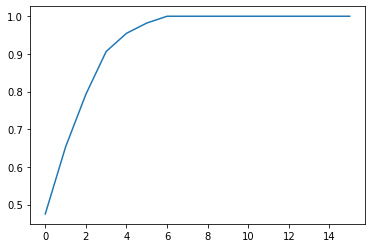

In [323]:
pca=PCA(whiten=True)
pca.fit(nmbr_dat)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)

In [324]:
np.sum(pca.explained_variance_ratio_)

1.0

In [325]:
pca.n_components_

16

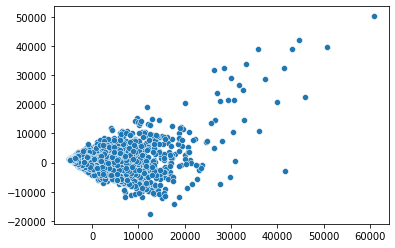

In [326]:
X2D=PCA(n_components=2).fit_transform(nmbr_dat)
sns.scatterplot(x=X2D[:,0],y=X2D[:,1])

# **CLUSTERING**

In [327]:
X=PCA(n_components=2).fit_transform(nmbr_dat)
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [328]:
print(kmeans.labels_)
print(kmeans.inertia_)

[1 0 1 ... 1 1 1]
143108140284.03043


Text(0, 0.5, 'Inertia')

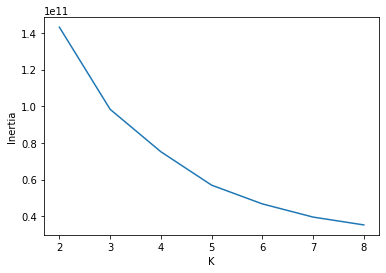

In [329]:
K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i).fit(X).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

For n_clusters = 2 The average silhouette_score is : 0.5980231733878
For n_clusters = 3 The average silhouette_score is : 0.5720263509632014
For n_clusters = 4 The average silhouette_score is : 0.5052362906675846
For n_clusters = 5 The average silhouette_score is : 0.5052025936027498
For n_clusters = 6 The average silhouette_score is : 0.5129141780395329
For n_clusters = 7 The average silhouette_score is : 0.4447730865404185
For n_clusters = 8 The average silhouette_score is : 0.4592218853472397


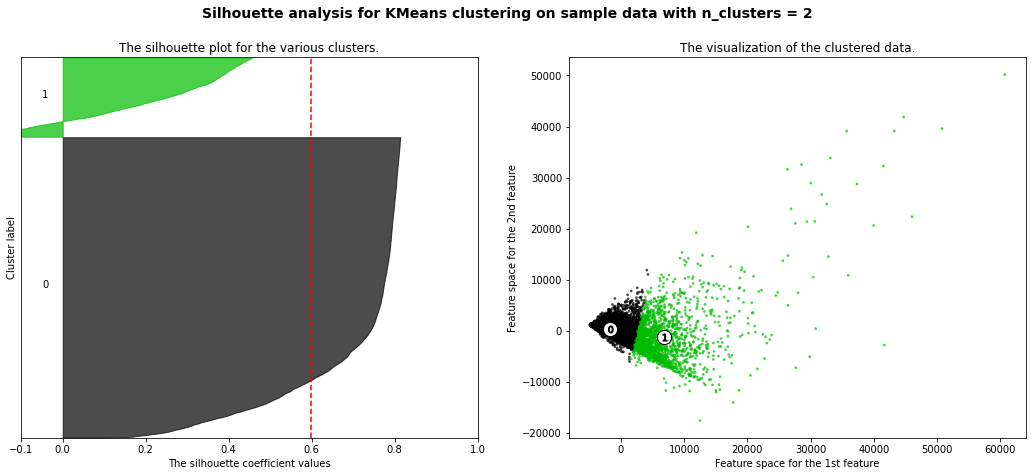

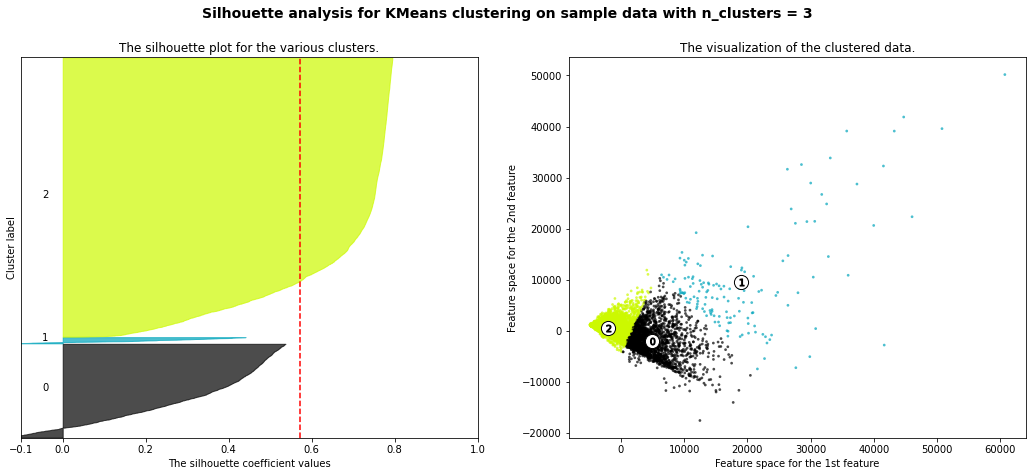

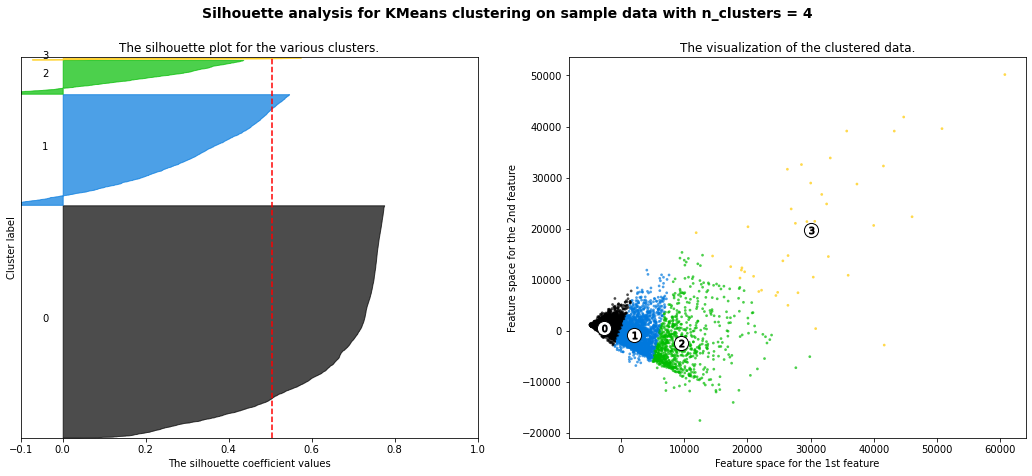

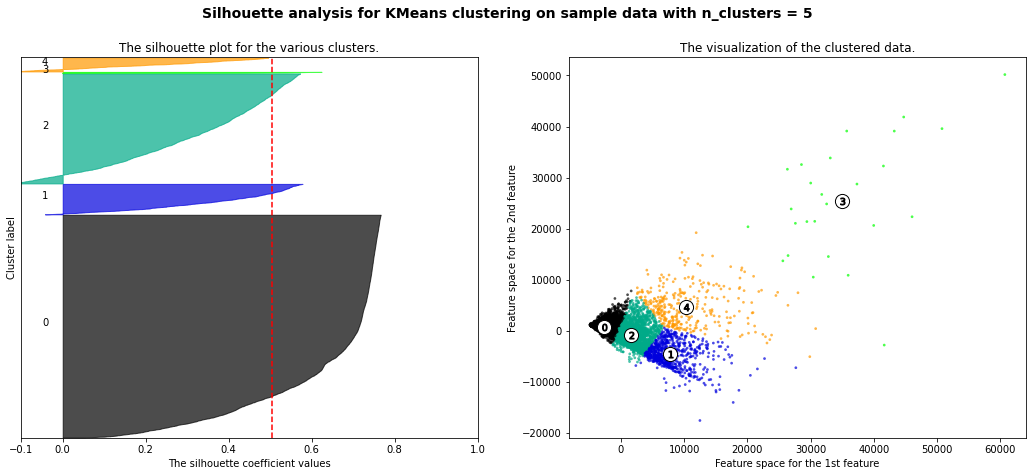

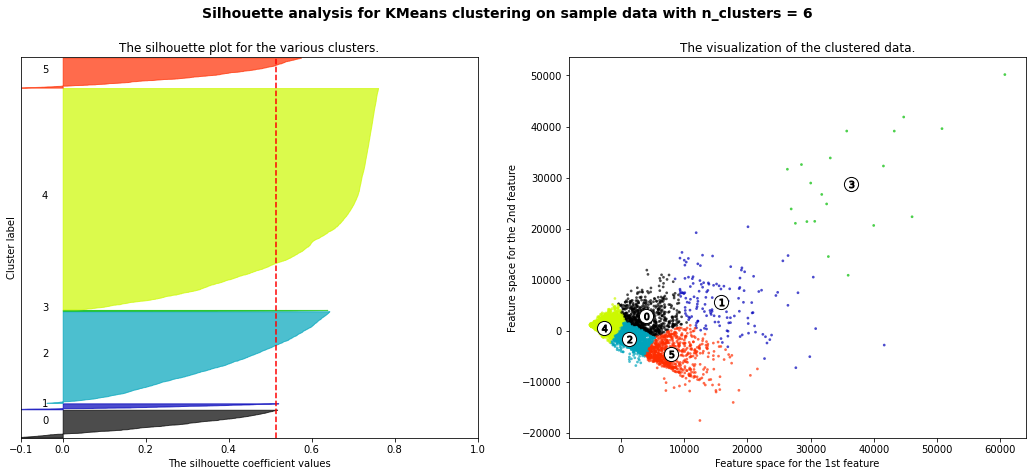

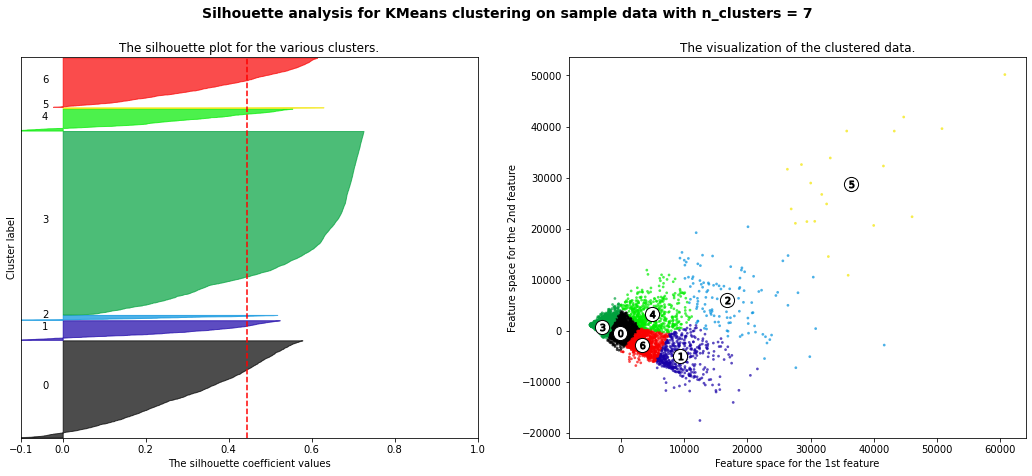

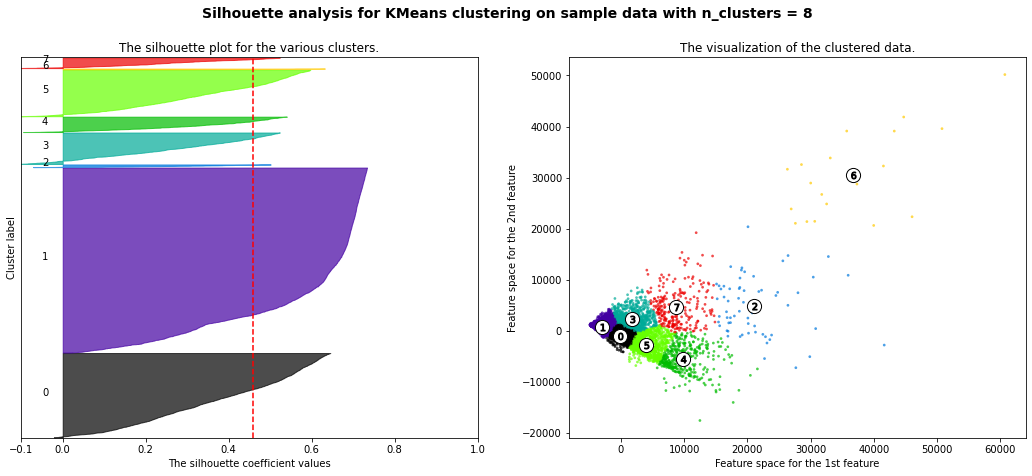

In [330]:
plot_silhouette(K,X)

Text(0, 0.5, 'Inertia')

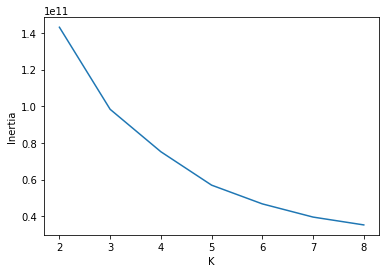

In [331]:
#Menggunakan PCA

K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i).fit(X2D).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhouette Score')

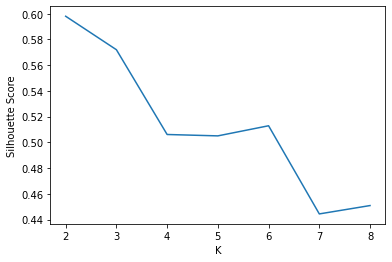

In [332]:
K=[2,3,4,5,6,7,8]
#inertia=[KMeans(n_clusters=i).fit(X2D).inertia_ for i in K]
s_score=[silhouette_score(X2D, KMeans(n_clusters=i).fit(X2D).labels_) for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

For n_clusters = 2 The average silhouette_score is : 0.5980231733878002
For n_clusters = 3 The average silhouette_score is : 0.5720263509632015
For n_clusters = 4 The average silhouette_score is : 0.5052362906675847
For n_clusters = 5 The average silhouette_score is : 0.5052025936027499
For n_clusters = 6 The average silhouette_score is : 0.512914178039533
For n_clusters = 7 The average silhouette_score is : 0.4447730865404187
For n_clusters = 8 The average silhouette_score is : 0.4592218853472398


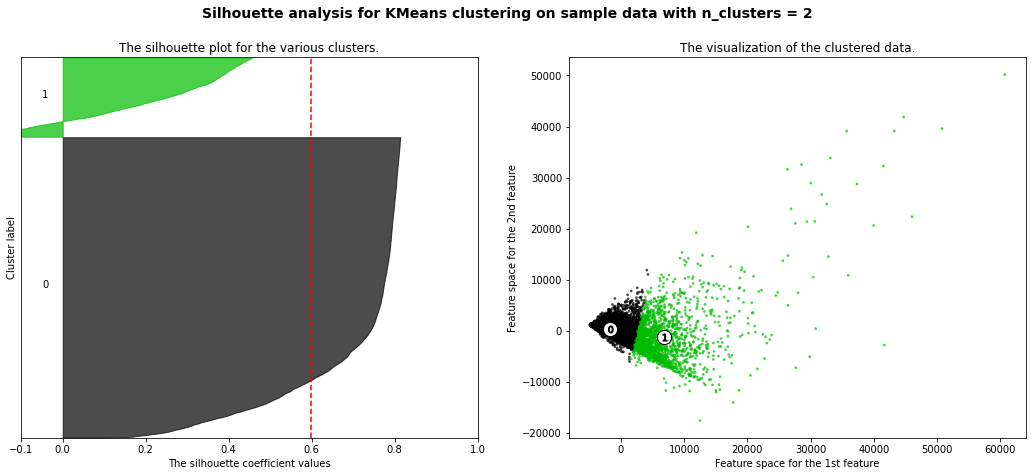

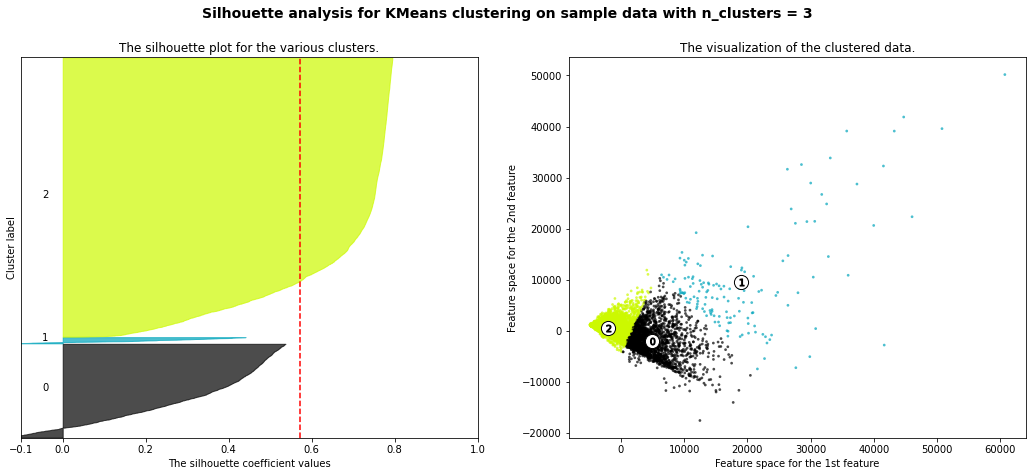

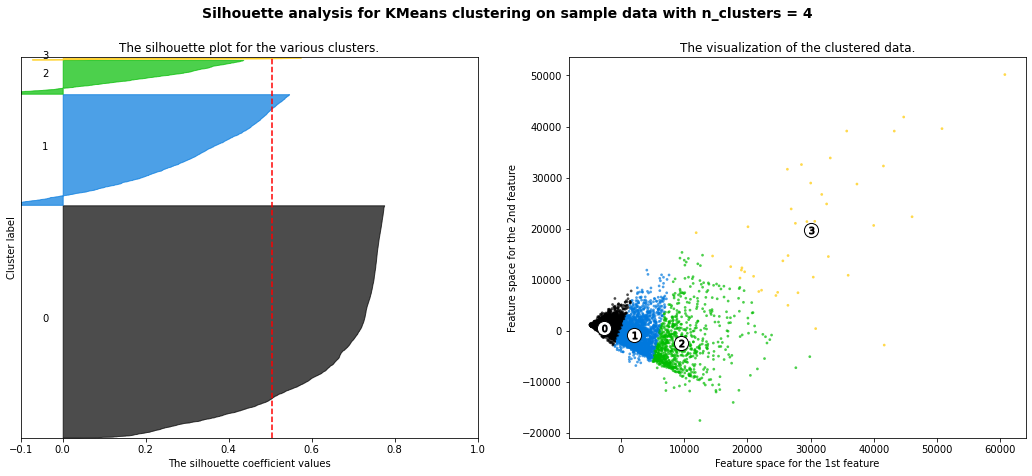

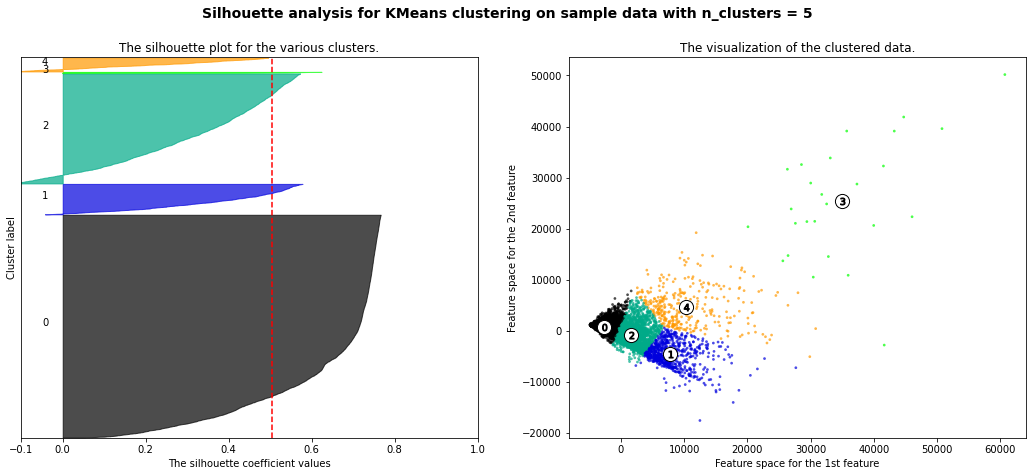

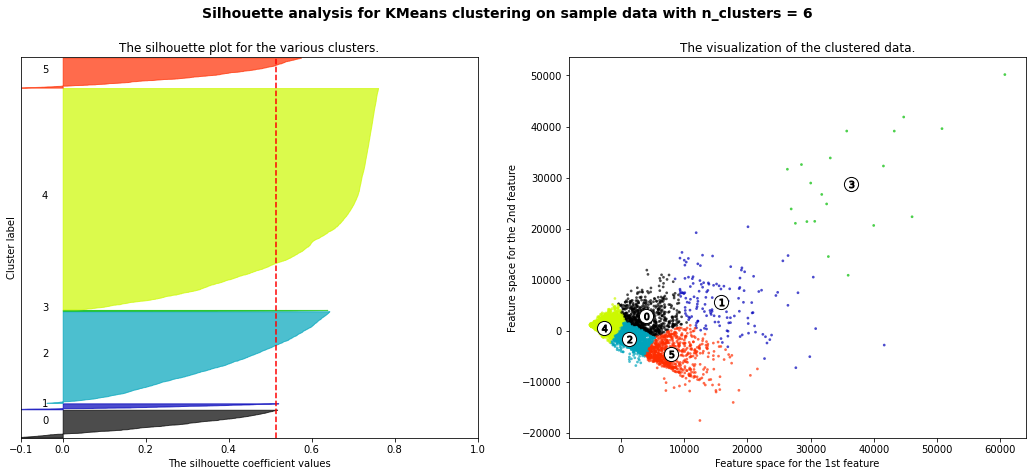

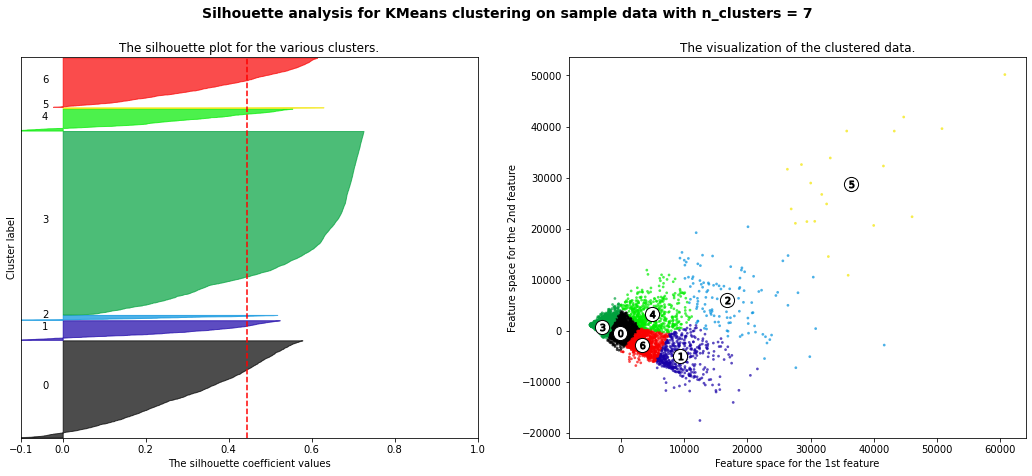

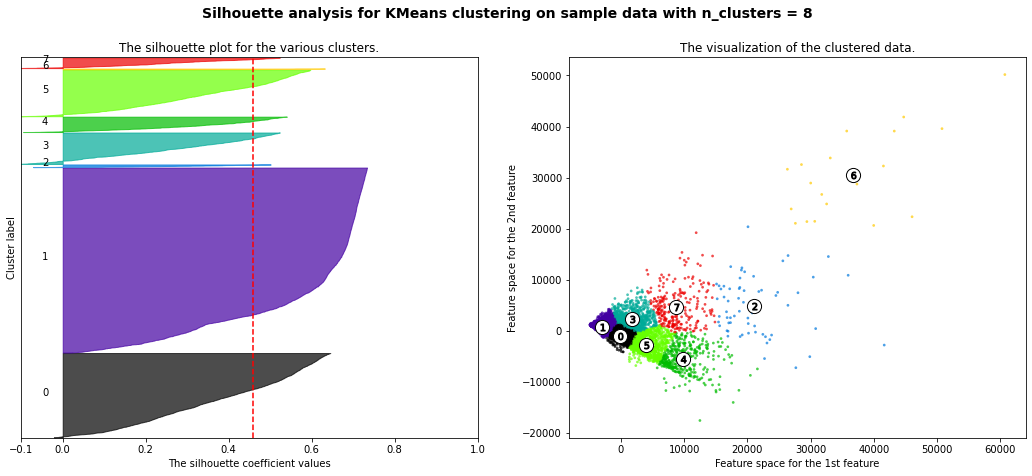

In [333]:
plot_silhouette(K,X2D)

# **DBSCAN**

In [334]:
dbscan = DBSCAN(eps=0.05, min_samples=10)
dbscan.fit(X2D)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [335]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=50, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

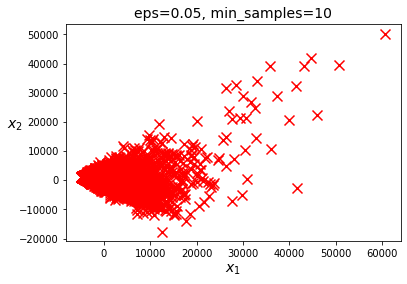

In [336]:
plot_dbscan(dbscan,X2D,size=100)

[-1 -1 -1 ... -1 -1 -1]


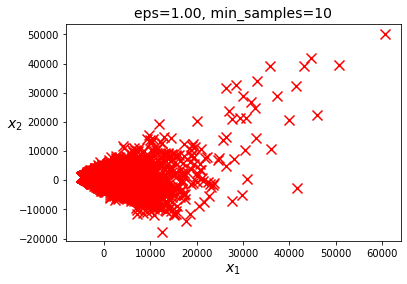

In [337]:
dbscan=DBSCAN(eps=1, min_samples=10)
dbscan.fit(X2D)
plot_dbscan(dbscan,X2D,size=600)
print(dbscan.labels_)

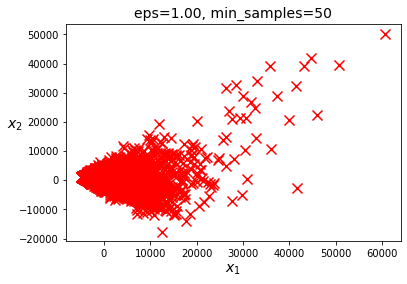

In [338]:
dbscan=DBSCAN(eps=1, min_samples=50)
dbscan.fit(X2D)
plot_dbscan(dbscan,X2D,size=600)

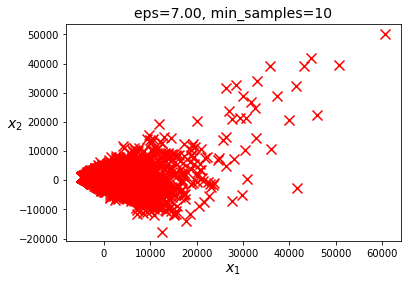

In [339]:
dbscan1=DBSCAN(eps=7, min_samples=10)
dbscan1.fit(X2D)
plot_dbscan(dbscan1,X2D,size=600)

In [340]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

# **AGGLOMERATIVE CLUSTERING**

In [341]:
agg=AC(linkage="ward").fit(X2D)

In [342]:
agg?

In [343]:
agg.n_clusters_

2

In [344]:
agg.labels_

array([1, 0, 0, ..., 1, 1, 1])

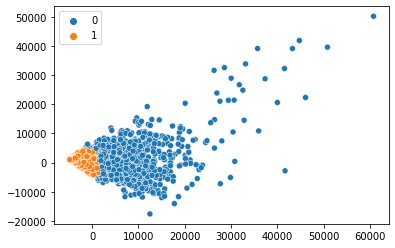

In [345]:
sns.scatterplot(x=X2D[:,0],y=X2D[:,1],hue=agg.labels_)

# **SPECTRAL CLUSTERING**

In [346]:
scl = SC(n_clusters=2, gamma=10)
scl.fit(X2D)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:304: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:304: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: Runtime

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=10,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None)

In [347]:
scl.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

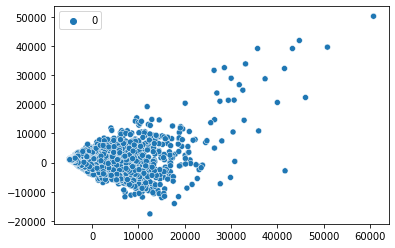

In [348]:
sns.scatterplot(x=X2D[:,0],y=X2D[:,1],hue=scl.labels_)

# **MODEL INFERENCE**

# **LABELLING DENGAN K-MEANS**

In [349]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.802084,139.51,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.032597,1072.34,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.066742,627.285,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.334763,244.791,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000,325.594462,48.8864,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000,81.270775,82.4184,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500,52.549959,55.7556,0.250000,6


In [350]:
df['Labels'] = kmeans.labels_

In [351]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.802084,139.51,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.032597,1072.34,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.066742,627.285,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.000000,864.206542,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.334763,244.791,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000,325.594462,48.8864,0.500000,6,1
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000,275.861322,864.206542,0.000000,6,1
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000,81.270775,82.4184,0.250000,6,1
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500,52.549959,55.7556,0.250000,6,1


In [352]:
df.Labels.unique()

array([1, 0], dtype=int32)

In [353]:
df_lab_0 = df[df['Labels'] == 0]
df_lab_0

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.032597,1072.34,0.222222,12,0
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500,6354.314328,198.066,1.000000,12,0
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000,1164.770591,100.302,0.000000,12,0
15,C10016,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000,1993.439277,2109.91,0.000000,12,0
18,C10019,1989.072228,1.000000,504.35,166.00,338.35,0.000000,0.666667,0.083333,0.583333,0.000000,0,9,13000,1720.837373,744.613,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,C18982,40.960739,0.181818,472.75,431.37,41.38,0.000000,0.181818,0.181818,0.090909,0.000000,0,7,13000,0.000000,864.206542,0.000000,11,0
8774,C19013,2585.246439,0.909091,338.00,0.00,338.00,0.000000,0.545455,0.000000,0.454545,0.000000,0,6,9000,866.276894,776.502,0.000000,11,0
8813,C19053,3335.053583,0.700000,0.00,0.00,0.00,5823.467109,0.000000,0.000000,0.000000,0.300000,3,0,7000,931.371718,1006.98,0.000000,10,0
8857,C19098,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000,8157.666434,283.362,0.200000,7,0


In [354]:
df_lab_1 = df[df['Labels'] == 1]
df_lab_1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Labels
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.802084,139.51,0.00,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.066742,627.285,0.00,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.000000,864.206542,0.00,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.334763,244.791,0.00,12,1
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800,1400.057770,2407.25,0.00,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000,325.594462,48.8864,0.50,6,1
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000,275.861322,864.206542,0.00,6,1
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000,81.270775,82.4184,0.25,6,1
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500,52.549959,55.7556,0.25,6,1


# **MODEL ANALYSIS**

Setelah dilakukan klasterisasi pada model K-means, DBSCAN, Agglomerative, dan Spectral dihasilkan bahwa

*   Model K-means menghasilkan 2 klaster 0 dan 1
*   Model Agglomerative menghasilkan 2 klaster 0 dan 1


*   Sedangkan model DBSCAN dan Spectral menghasilkan 1 klaster secara berurutan yaitu -1 untuk DBSCAN dan 0 untuk Spectral
*   Sudah dilakukan perubahan nilai s dan epsilon namun tetap menghasilkan 1 klaster maka dari itu hal tersebut sedang dicari tau mengapa bisa hanya menghasilkan 1 klaster saja



